In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [2]:
save_dir = "/cluster/home/kamara/conceptx"

In [3]:
folder_path = os.path.join(save_dir, f"results/faithfulness")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        print("full_path:", full_path)
        df = pd.read_csv(full_path)

        if "batch" in parts[1]:
            dataset_idx = 3
            df["batch"] = parts[2]
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "aspect": "_a"}).fillna("")
df_all


parts:  ['faithfulness', 'batch', '2', 'alpaca', 'gemma-3-4b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/gemma-3-4b/alpaca/conceptshap/seed_0/faithfulness_batch_2_alpaca_gemma-3-4b_conceptshap_0.csv
parts:  ['faithfulness', 'batch', '1', 'alpaca', 'gemma-3-4b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/gemma-3-4b/alpaca/conceptshap/seed_0/faithfulness_batch_1_alpaca_gemma-3-4b_conceptshap_0.csv
parts:  ['faithfulness', 'batch', '4', 'alpaca', 'gemma-3-4b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/gemma-3-4b/alpaca/conceptshap/seed_0/faithfulness_batch_4_alpaca_gemma-3-4b_conceptshap_0.csv
parts:  ['faithfulness', 'batch', '0', 'alpaca', 'gemma-3-4b', 'conceptshap', '0.csv']
full_path: /cluster/home/kamara/conceptx/results/faithfulness/gemma-3-4b/alpaca/conceptshap/seed_0/faithfulness_batch_0_alpaca_gemma-3-4b_conceptshap_0.csv
parts:  ['faithfulness', 'ba

,id,input,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,batch,dataset,model,explainer,baseline,seed
0,528,Find the temperature of boiling water at sea l...,-0.018816,-0.018816,0.008274,0.130592,0.833507,0.741507,0.622353,0.872449,1.000000,1.000000,1.000000,2,alpaca,gemma-3-4b,conceptshap,None,0
1,531,Outline a strategy for increasing website traf...,0.090499,0.090499,0.103331,0.580122,0.580122,0.738915,0.678857,0.678857,0.873121,0.874667,0.874667,2,alpaca,gemma-3-4b,conceptshap,None,0
2,532,Make a list of four styles of furniture.,0.063817,0.063817,0.039399,0.039621,0.293720,0.571229,0.571229,0.571229,0.571229,0.571229,0.571229,2,alpaca,gemma-3-4b,conceptshap,None,0
3,533,List four strategies for teaching children to ...,0.137054,0.137054,0.040423,0.544967,0.677624,0.831639,0.831639,0.973240,0.970094,0.970094,0.970094,2,alpaca,gemma-3-4b,conceptshap,None,0
4,534,Compute the derivative of 2x^2 + 5x.,-0.039890,-0.039890,0.285973,0.663107,0.663107,0.834941,1.000000,1.000000,1.000000,1.000000,1.000000,2,alpaca,gemma-3-4b,conceptshap,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,273,What is the main purpose of blockchain technol...,-0.039753,-0.039753,0.728110,0.730809,0.788462,0.878620,0.878620,0.776826,0.776826,0.776826,0.776826,0,alpaca,llama-3-3b,conceptx,None,0
3967,274,Come up with a creative metaphor for smile,0.042600,0.042600,0.438978,0.300786,0.108008,0.635884,0.635884,0.689392,0.689392,0.689392,0.689392,0,alpaca,llama-3-3b,conceptx,None,0
3968,282,How many bytes are there in a kilobyte?,0.093420,0.093420,0.298507,0.565635,0.571947,0.571947,0.571947,0.571947,0.571947,0.571947,0.571947,0,alpaca,llama-3-3b,conceptx,None,0
3969,283,Generate a creative description of a sunset in...,0.208317,0.067925,0.102861,0.149720,0.068568,0.095389,0.136527,0.136527,0.136527,0.136527,0.136527,0,alpaca,llama-3-3b,conceptx,None,0


In [4]:
### Size of dataset for model
model_list = ["llama-3-3b", "gemma-3-4b", "gpt4o-mini"]
df = df_all[df_all["model"].isin(model_list)]
df_stats = df.groupby(["dataset", "model", "explainer"])["id"].nunique().reset_index()

In [5]:
dataset = "alpaca"
df_stats[df_stats['dataset']==dataset]

,dataset,model,explainer,id
0,alpaca,gemma-3-4b,conceptshap,494
1,alpaca,gemma-3-4b,conceptx,490
2,alpaca,gemma-3-4b,random,500
3,alpaca,gemma-3-4b,tokenshap,500
4,alpaca,llama-3-3b,conceptshap,494
5,alpaca,llama-3-3b,conceptx,493
6,alpaca,llama-3-3b,random,500
7,alpaca,llama-3-3b,tokenshap,500


In [12]:
df = df_all[df_all["model"].isin(model_list)]
df_stats2 = df.groupby(["dataset", "batch", "model", "explainer"])["id"].nunique().reset_index()
df_explore = df_stats2[df_stats2['dataset']==dataset]
df_explore

,dataset,batch,model,explainer,id
315,sst2,0,gemma-3-4b,conceptshap,97
316,sst2,0,gemma-3-4b,conceptx,91
317,sst2,0,gemma-3-4b,conceptx_a,93
318,sst2,0,gemma-3-4b,random,100
319,sst2,0,gemma-3-4b,tokenshap,100
...,...,...,...,...,...
460,sst2,9,llama-3-3b,conceptshap,98
461,sst2,9,llama-3-3b,conceptx,94
462,sst2,9,llama-3-3b,conceptx_a,95
463,sst2,9,llama-3-3b,random,100


In [13]:
for i in range(10):
    print(df_explore[df_explore["batch"]==str(i)])

    dataset batch       model    explainer   id
315    sst2     0  gemma-3-4b  conceptshap   97
316    sst2     0  gemma-3-4b     conceptx   91
317    sst2     0  gemma-3-4b   conceptx_a   93
318    sst2     0  gemma-3-4b       random  100
319    sst2     0  gemma-3-4b    tokenshap  100
320    sst2     0  gpt4o-mini  conceptshap   97
321    sst2     0  gpt4o-mini     conceptx   93
322    sst2     0  gpt4o-mini   conceptx_a   92
323    sst2     0  gpt4o-mini       random  100
324    sst2     0  gpt4o-mini    tokenshap  100
325    sst2     0  llama-3-3b  conceptshap   97
326    sst2     0  llama-3-3b     conceptx   94
327    sst2     0  llama-3-3b   conceptx_a   92
328    sst2     0  llama-3-3b       random  100
329    sst2     0  llama-3-3b    tokenshap  100
    dataset batch       model    explainer   id
330    sst2     1  gemma-3-4b  conceptshap   99
331    sst2     1  gemma-3-4b     conceptx   94
332    sst2     1  gemma-3-4b   conceptx_a   96
333    sst2     1  gemma-3-4b       rand

In [10]:
dataset = "alpaca"
model_name = "llama-3-3b"

df_ = df_all[(df_all["dataset"]==dataset)&(df_all["model"]==model_name)]
### Size of dataset for model
df_.groupby("explainer")["id"].nunique()

explainer
conceptshap    494
conceptx       493
random         500
tokenshap      500
Name: id, dtype: int64

In [6]:
explainer_map = {'conceptx': 'ConceptX', 'conceptx_r': 'ConceptX-R', 'conceptx_a': 'ConceptX-A', 'conceptshap': 'ConceptSHAP', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
pal = sns.color_palette("tab20b")

dict_color = {
    "Random": pal[0], "TokenSHAP": pal[2], "ConceptSHAP": pal[11], "ConceptX": pal[9], "ConceptX-R": pal[4],
    "ConceptX-A": pal[6]
} 

legend_order = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-R", "ConceptX-A"]
legend_order_sentiment = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX", "ConceptX-A"]
legend_order_alpaca = ["Random", "TokenSHAP", "ConceptSHAP", "ConceptX"]


/tmp/ipykernel_3105301/3252876770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = df["explainer"].replace(explainer_map)
/tmp/ipykernel_3105301/3252876770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)


       id                                              input   sim_0.0  \
1984  301     Explain what is meant by the circle of fifths.  0.107920   
1985  311                 Write a definition of "photoshop". -0.000771   
1986  312     List five factors that lead to global warming.  0.020344   
1987  313                           Name 5 invasive species.  0.109317   
1988  314                           What is an AI algorithm?  0.112661   
...   ...                                                ...       ...   
3966  273  What is the main purpose of blockchain technol... -0.039753   
3967  274         Come up with a creative metaphor for smile  0.042600   
3968  282            How many bytes are there in a kilobyte?  0.093420   
3969  283  Generate a creative description of a sunset in...  0.208317   
3970  299  Name three diseases that can be caused by poor...  0.060989   

       sim_0.1   sim_0.2   sim_0.3   sim_0.4   sim_0.5   sim_0.6   sim_0.7  \
1984  0.107920  0.561465  0.01138

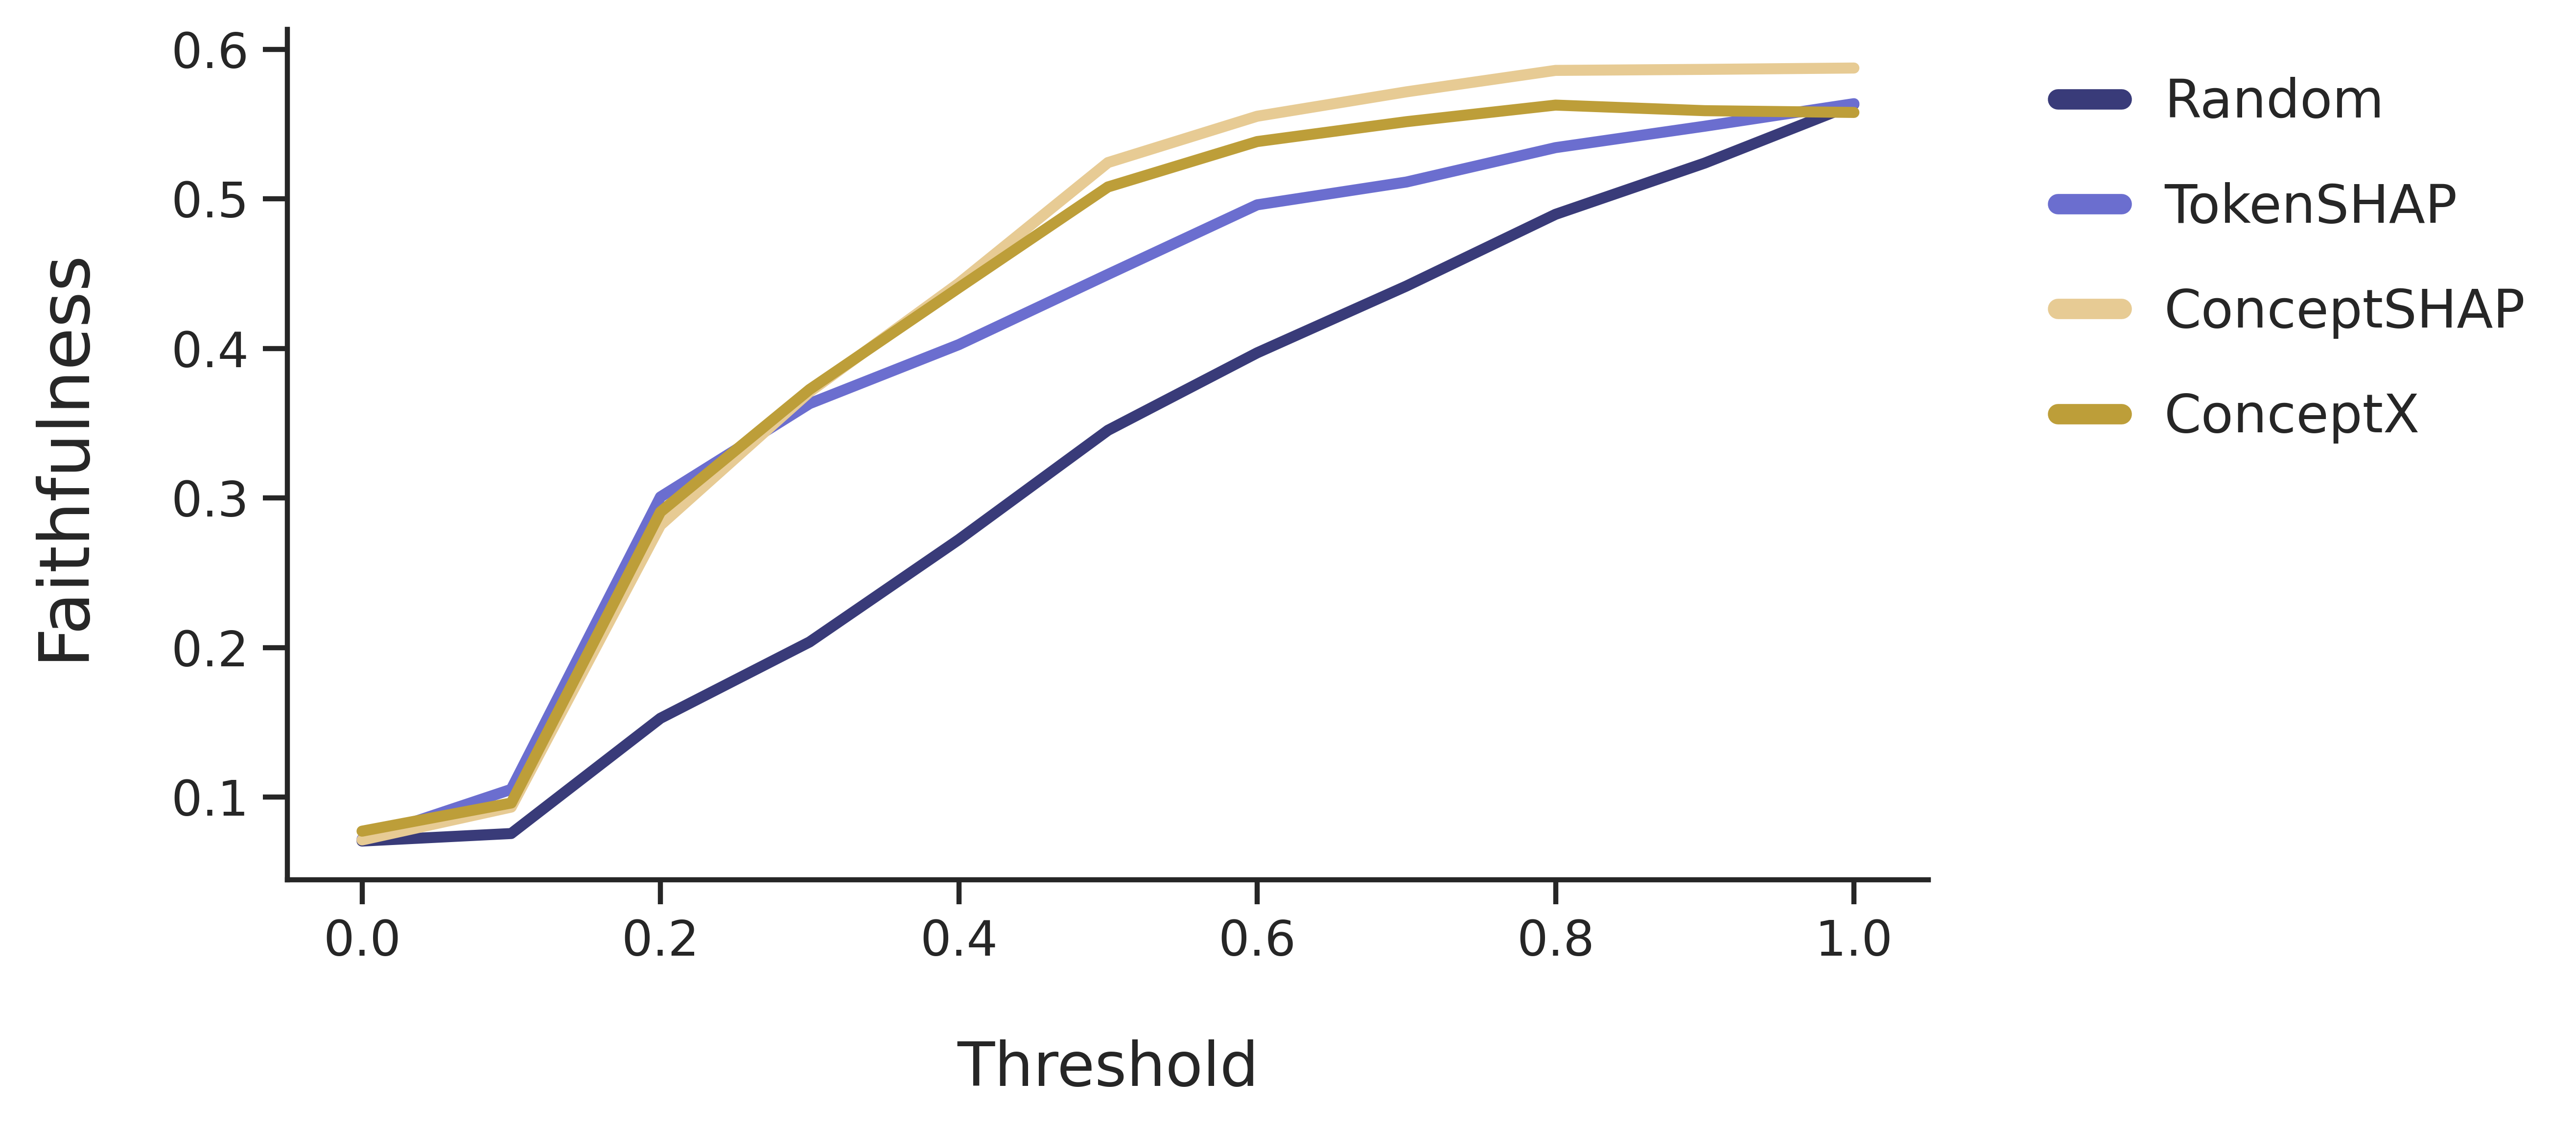

In [11]:
df = df_


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)

# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "input", "explainer"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(9, 4))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=2.7, errorbar=None
)

plt.xlabel('Threshold', fontsize=15, labelpad=18)  # Increase space between axis label and ticks
plt.ylabel('Faithfulness', fontsize=17, labelpad=18)  # Increase space between axis label and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim(0.18,0.3)

# Create a single legend at the top, vertically
handles, labels = plt.gca().get_legend_handles_labels()
if dataset == "alpaca":
    ordered_handles = [handles[labels.index(label)] for label in legend_order_alpaca]
    ordered_labels = [label for label in legend_order_alpaca]
elif dataset in ["sst2", "sentiment"]:
    ordered_handles = [handles[labels.index(label)] for label in legend_order_sentiment]
    ordered_labels = [label for label in legend_order_sentiment]
else:
    ordered_handles = [handles[labels.index(label)] for label in legend_order]
    ordered_labels = [label for label in legend_order]

legend = plt.legend(
    ordered_handles, ordered_labels, loc='upper left',
    bbox_to_anchor=(1.05, 1), ncol=1, fontsize=13, frameon=False,
    handlelength=1.2, labelspacing=1  # Adjust thickness of legend handle, decrease length of line
)

for line in legend.get_lines():
    line.set_linewidth(5)  # Increase line width in legend
    
sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/faithfulness/faithfulness_{model_name}_{dataset}.pdf")
plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()